This notebook generates Figure 1 of Elipot et al. 2024 HYCOM-OceanTrack: Integrated HYCOM Eulerian Fields and Lagrangian Trajectories Dataset.

In [1]:
# %% script to generate figure 1 of paper
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import s3fs
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
# Set the fontsize of figures
plt.rcParams.update({'font.size': 12})

In [3]:
# Access the data
bucket_name = 'hycom-global-drifters'
zarr_bathy_store_path = bucket_name+'/eulerian/hycom12_bathy.zarr'
s3 = s3fs.S3FileSystem(anon=True)
store0 = s3fs.S3Map(root=zarr_bathy_store_path, s3=s3)
ds_bathy = xr.open_zarr(store0, consolidated="auto").load()
ds_bathy

<xarray.Dataset>
Dimensions:     (Y: 7055, X: 9000)
Coordinates:
    Latitude    (Y, X) float32 -86.0 -86.0 -86.0 -86.0 ... 47.1 47.07 47.04
    Longitude   (Y, X) float32 74.16 74.19 74.22 74.26 ... 74.14 74.14 74.14
  * X           (X) int32 1 2 3 4 5 6 7 8 ... 8994 8995 8996 8997 8998 8999 9000
  * Y           (Y) int32 1 2 3 4 5 6 7 8 ... 7049 7050 7051 7052 7053 7054 7055
Data variables:
    bathymetry  (Y, X) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  CF-1.0
    experiment:   10.2
    history:      archv2ncdf2d
    source:       HYCOM archive file
    title:        HYCOM

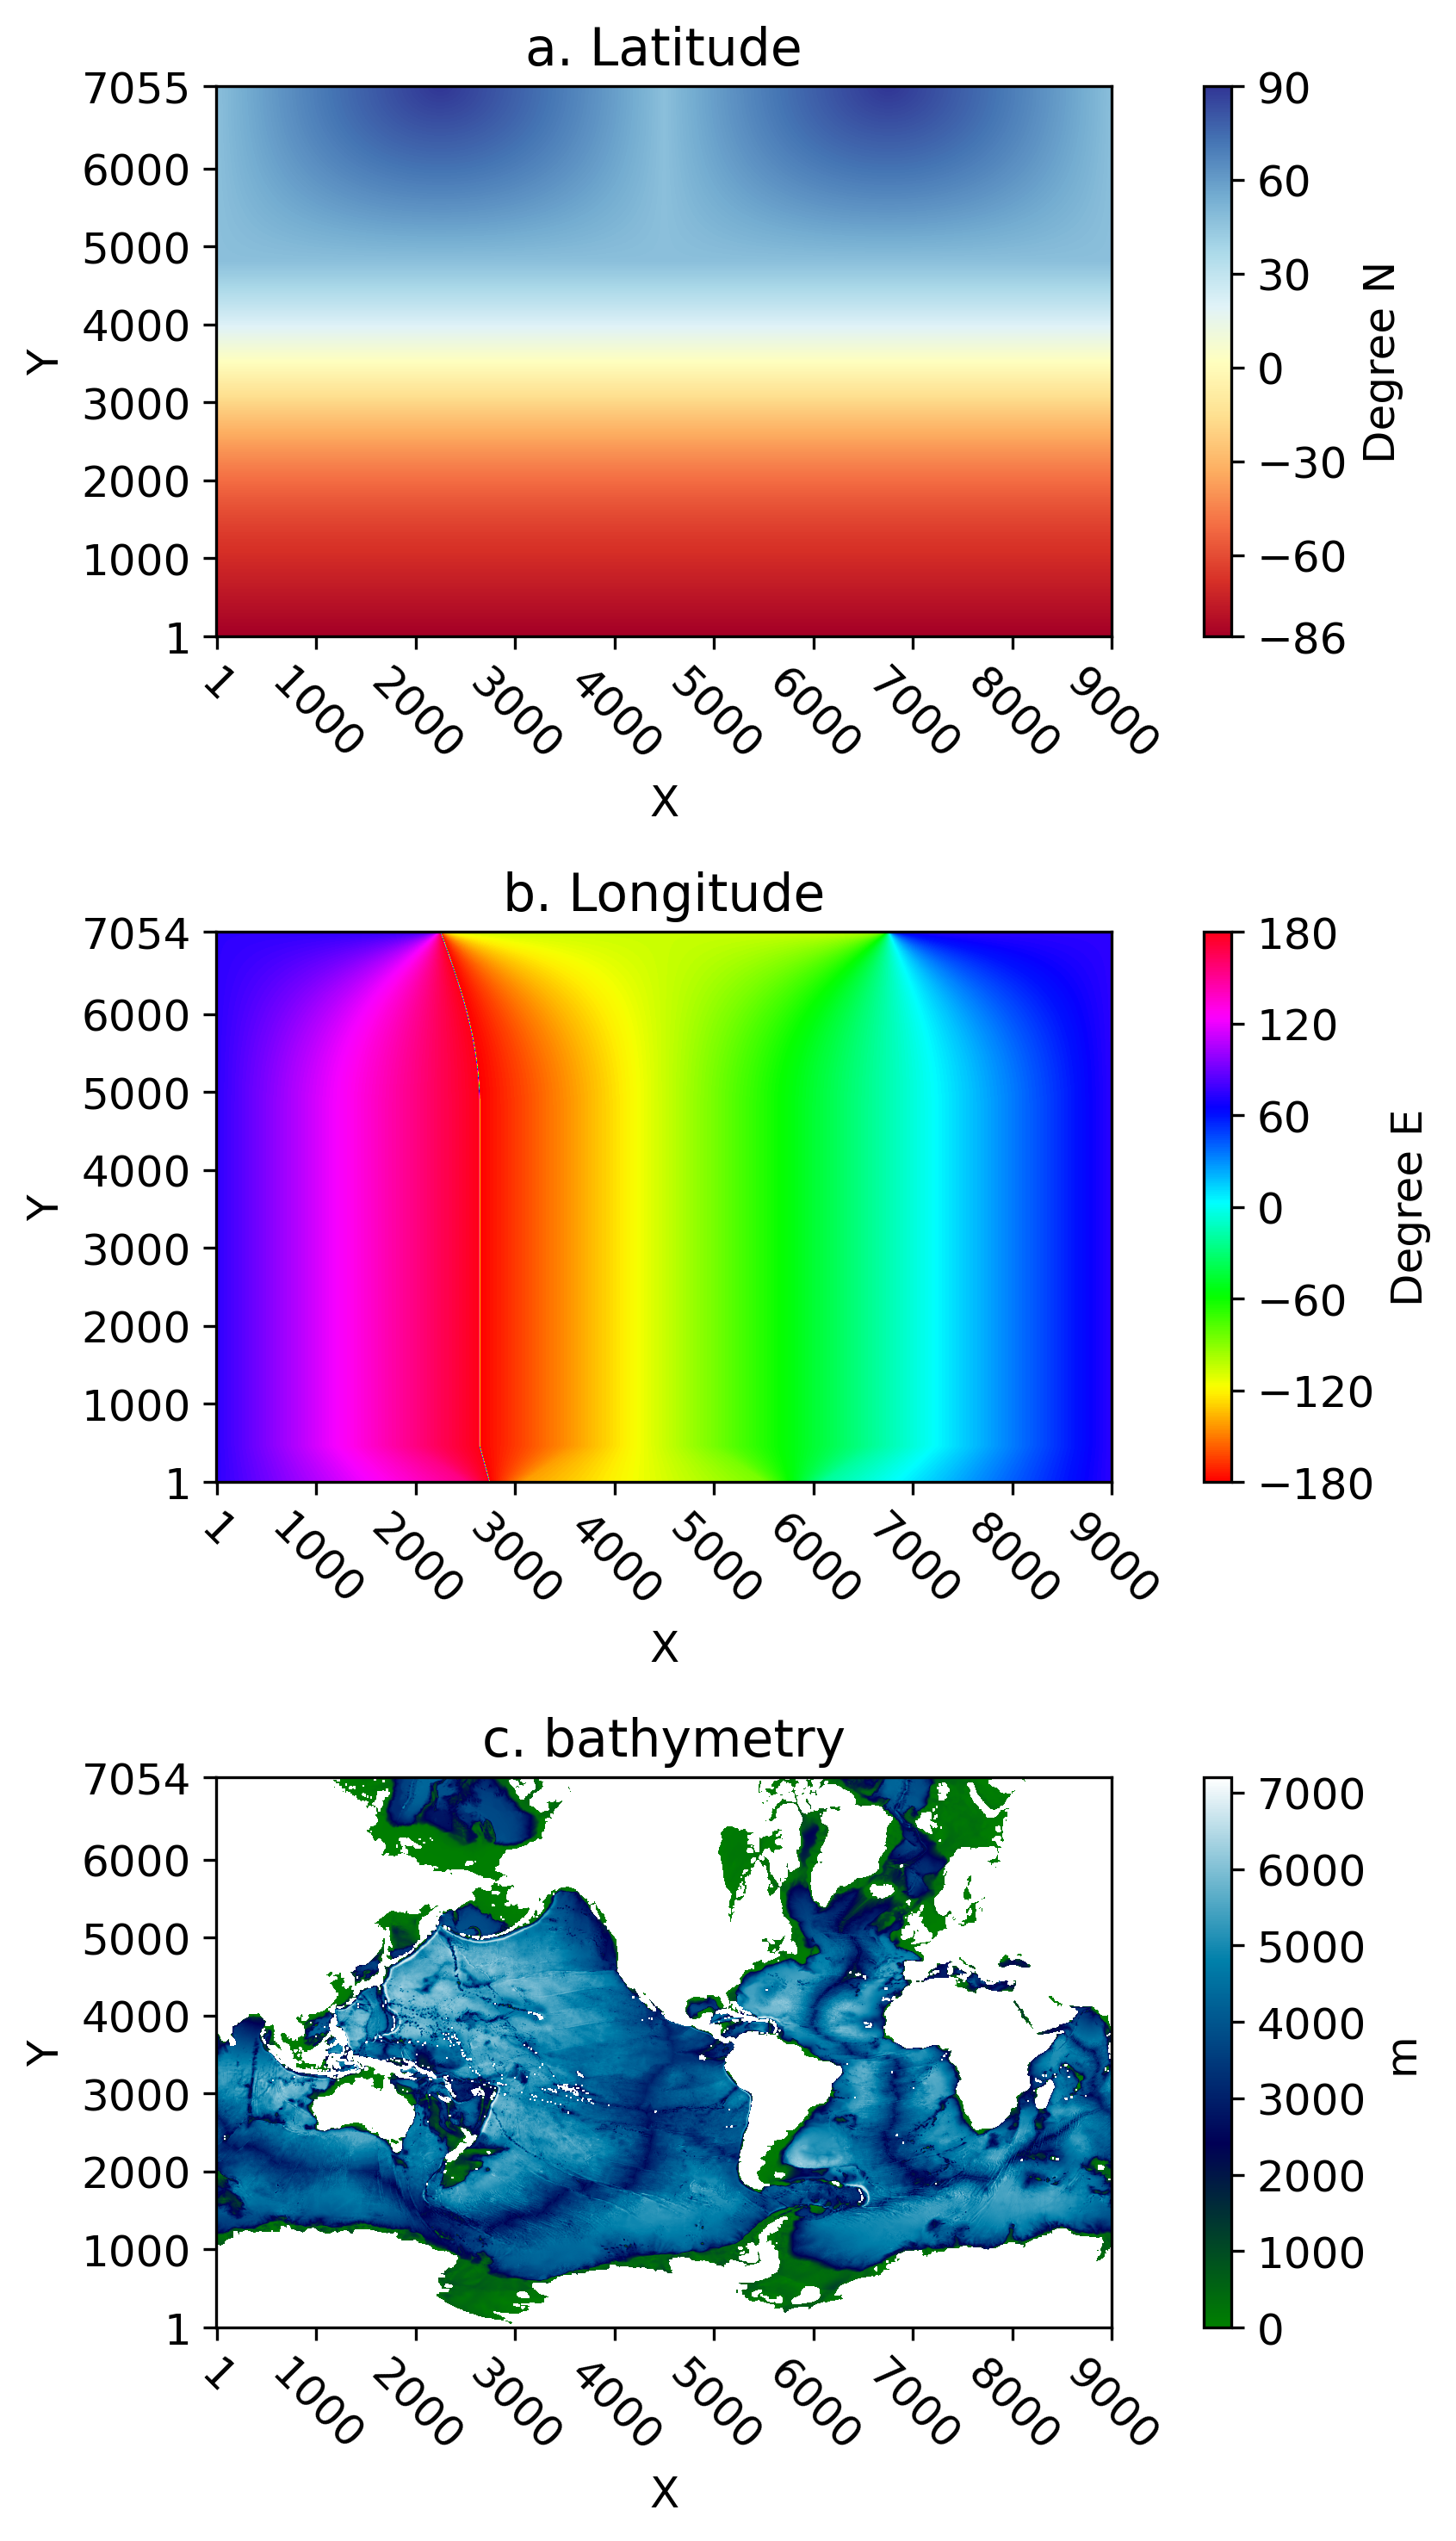

In [4]:
# Create a figure with three subplots
cmap1 = mpl.colormaps["RdYlBu"]
cmap2 = mpl.colormaps["hsv"]
cmap3 = mpl.colormaps["ocean"]
# get the maximum depth in the model
bathymax = ds_bathy["bathymetry"].max().values

fig, axs = plt.subplots(3, 1, figsize=(7.5,10),dpi=300)

# Plot the latitude grid
im0 = axs[0].imshow(ds_bathy["Latitude"], cmap=cmap1, origin='lower',aspect=7055/9000)
axs[0].set_title('a. Latitude')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_xticks([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
axs[0].set_xticklabels(axs[0].get_xticks(), rotation=-45)
axs[0].set_yticks([1, 1000, 2000, 3000, 4000, 5000, 6000, 7054])
axs[0].set_yticklabels([1, 1000, 2000, 3000, 4000, 5000, 6000, 7055])

# Plot the longitude grid
im1 = axs[1].imshow(ds_bathy["Longitude"], cmap=cmap2, origin='lower',aspect=7055/9000)
axs[1].set_title('b. Longitude')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_xticks([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
axs[1].set_xticklabels(axs[0].get_xticks(), rotation=-45)
axs[1].set_yticks([1, 1000, 2000, 3000, 4000, 5000, 6000, 7054])

# Plot the depth of HYCOM
im2 = axs[2].imshow(ds_bathy["bathymetry"], cmap=cmap3, origin='lower',aspect=7055/9000,vmin=0, vmax=bathymax)
axs[2].set_title('c. bathymetry')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].set_xticks([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
axs[2].set_xticklabels(axs[0].get_xticks(), rotation=-45)
axs[2].set_yticks([1, 1000, 2000, 3000, 4000, 5000, 6000, 7054])

# Add colorbars to the subplots
cbar0 = fig.colorbar(im0, ax=axs[0], orientation='vertical', 
                     location='right', pad=0.05, shrink=1, 
                     #ticks = range(-90,90+30,30),label="Degree N")
                     ticks = [-86,-60,-30,0,30,60,89.98],label="Degree N")
cbar1 = fig.colorbar(im1, ax=axs[1], orientation='vertical', 
                     location='right', pad=0.05, shrink=1, 
                     #ticks = range(-180,180+60,60),label="Degree E")
                     ticks = [-180,-120,-60,0,60,120,179.99],label="Degree E")
cbar2 = fig.colorbar(im2, ax=axs[2], orientation='vertical', 
                        location='right', pad=0.05, shrink=1, 
                        ticks = range(0,8000,1000),label="m")
                     
# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure
plt.show()